# Exploratory Data Analysis

# 1. Analysis

1. Univarient anlysis 
2. multivarient anlysis

# 2. Feature Engineering

1. Creating New columns
2. Modifying Existing ones

# 3. handling outliers

1. Detect Outliers
2. Remove Outliners


In [289]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\kunde\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [290]:
#first import useful labrary 
import pandas as pd
import numpy as np
import seaborn as se
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kunde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [291]:
data= pd.read_csv("ecom.csv", encoding_errors='ignore')

In [292]:
data.shape

(541909, 9)

In [293]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8'],
      dtype='object')

In [294]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [295]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France,NaN


In [296]:
data.describe()

,Quantity,UnitPrice,CustomerID,Unnamed: 8
count,541909.000000,541909.000000,406829.000000,0.0
mean,9.552250,4.611114,15287.690570,NaN
std,218.081158,96.759853,1713.600303,NaN
min,-80995.000000,-11062.060000,12346.000000,NaN
25%,1.000000,1.250000,13953.000000,NaN
50%,3.000000,2.080000,15152.000000,NaN
75%,10.000000,4.130000,16791.000000,NaN
max,80995.000000,38970.000000,18287.000000,NaN


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [298]:
data["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [299]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

In [300]:
#see in last column there is lot of missing values so it is better to remove it 
data=data.drop(columns="Unnamed: 8", axis=1)

In [301]:
#check is it done or not
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,29-Nov-16,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,29-Nov-16,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,29-Nov-16,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,29-Nov-16,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,29-Nov-16,1.69,13047.0,United Kingdom


In [302]:
#see in customerid column we can see there is lot of variation 
data["CustomerID"].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [303]:
#customerid is not thatmuch important so we will drop it and another reason is it contained lot of missing values
#data=data.drop(columns="Unnamed: 8", axis=1)

In [304]:
data['word_count'] = data['Description'].apply(lambda x: len(str(x).split()))

In [305]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,5


In [306]:
#this function drop those rows in which all are missing values 
data.dropna(how = 'any', inplace = True)

In [307]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
word_count     0
dtype: int64

## Remove stopword in Description

In [308]:
stopwords = stopwords.words('english')
def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stopwords]
    new_text = " ".join(words)
    return new_text

In [309]:
data["Description"] = data["Description"].apply(lambda x:remove_stopwords(x))

In [310]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,5
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,29-Nov-16,7.65,17850.0,United Kingdom,5
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,29-Nov-16,4.25,17850.0,United Kingdom,5
7,536366,22633,HAND WARMER UNION JACK,6,29-Nov-16,1.85,17850.0,United Kingdom,4
8,536366,22632,HAND WARMER RED POLKA DOT,6,29-Nov-16,1.85,17850.0,United Kingdom,5
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,29-Nov-16,1.69,13047.0,United Kingdom,4


In [311]:
data.shape

(406829, 9)

# conversion of str into datetime format

In [312]:
type(data['InvoiceDate'][1]) 

str

In [313]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [314]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,5


# try to convert this string data into numerical form 

In [315]:
dic = {}
for i,k in enumerate(data["Country"].unique()):
    dic[k]=i
print(dic)

{'United Kingdom': 0, 'France': 1, 'Australia': 2, 'Netherlands': 3, 'Germany': 4, 'Norway': 5, 'EIRE': 6, 'Switzerland': 7, 'Spain': 8, 'Poland': 9, 'Portugal': 10, 'Italy': 11, 'Belgium': 12, 'Lithuania': 13, 'Japan': 14, 'Iceland': 15, 'Channel Islands': 16, 'Denmark': 17, 'Cyprus': 18, 'Sweden': 19, 'Austria': 20, 'Israel': 21, 'Finland': 22, 'Greece': 23, 'Singapore': 24, 'Lebanon': 25, 'United Arab Emirates': 26, 'Saudi Arabia': 27, 'Czech Republic': 28, 'Canada': 29, 'Unspecified': 30, 'Brazil': 31, 'USA': 32, 'European Community': 33, 'Bahrain': 34, 'Malta': 35, 'RSA': 36}


In [316]:
data.replace({"Country":dic}, inplace=True)

In [317]:
data["Country"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=int64)

In [318]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,word_count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,0,5
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,0,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,0,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,0,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,0,5


# cohort Analysis

In [319]:
data = data.drop(columns=["InvoiceNo", "StockCode", "Description", "Country","word_count"], axis=1)

In [320]:
data_1 = data

In [321]:
data.head(10)

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2016-11-29,2.55,17850.0
1,6,2016-11-29,3.39,17850.0
2,8,2016-11-29,2.75,17850.0
3,6,2016-11-29,3.39,17850.0
4,6,2016-11-29,3.39,17850.0
5,2,2016-11-29,7.65,17850.0
6,6,2016-11-29,4.25,17850.0
7,6,2016-11-29,1.85,17850.0
8,6,2016-11-29,1.85,17850.0
9,32,2016-11-29,1.69,13047.0


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     406829 non-null  int64         
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   UnitPrice    406829 non-null  float64       
 3   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 31.6 MB


In [323]:
#we have to convert this customer id data type 
data["CustomerID"] = data["CustomerID"].astype(int)

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     406829 non-null  int64         
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   UnitPrice    406829 non-null  float64       
 3   CustomerID   406829 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 30.1 MB


In [325]:
data=data.sort_values(["CustomerID", "InvoiceDate"])

In [326]:
first_purchase = data.groupby("CustomerID").first()

In [327]:
first_purchase

,Quantity,InvoiceDate,UnitPrice
CustomerID,,,
12346,74215,2017-01-16,1.04
12347,12,2016-12-05,2.10
12348,72,2016-12-14,0.55
12349,2,2017-11-19,7.50
12350,12,2017-01-31,2.10
...,...,...,...
18280,3,2017-03-05,7.90
18281,12,2017-06-10,0.42
18282,1,2017-08-03,12.75


In [328]:
first_purchase["InvoiceDate"].min()

Timestamp('2016-11-29 00:00:00')

In [329]:
first_purchase["InvoiceDate"].max()

Timestamp('2017-12-07 00:00:00')

# Visualize: All Purchase within COHORT

In [330]:
first_purchase

,Quantity,InvoiceDate,UnitPrice
CustomerID,,,
12346,74215,2017-01-16,1.04
12347,12,2016-12-05,2.10
12348,72,2016-12-14,0.55
12349,2,2017-11-19,7.50
12350,12,2017-01-31,2.10
...,...,...,...
18280,3,2017-03-05,7.90
18281,12,2017-06-10,0.42
18282,1,2017-08-03,12.75


In [331]:
#first_purchase.set_index(["InvoiceDate"])
#first_purchase.set_index(['InvoiceDate'], inplace = True)

In [332]:
first_purchase

,Quantity,InvoiceDate,UnitPrice
CustomerID,,,
12346,74215,2017-01-16,1.04
12347,12,2016-12-05,2.10
12348,72,2016-12-14,0.55
12349,2,2017-11-19,7.50
12350,12,2017-01-31,2.10
...,...,...,...
18280,3,2017-03-05,7.90
18281,12,2017-06-10,0.42
18282,1,2017-08-03,12.75


In [333]:
#reset index 
first_purchase.reset_index(level =['CustomerID'], inplace = True)

In [334]:
first_purchase

,CustomerID,Quantity,InvoiceDate,UnitPrice
0,12346,74215,2017-01-16,1.04
1,12347,12,2016-12-05,2.10
2,12348,72,2016-12-14,0.55
3,12349,2,2017-11-19,7.50
4,12350,12,2017-01-31,2.10
...,...,...,...,...
4367,18280,3,2017-03-05,7.90
4368,18281,12,2017-06-10,0.42
4369,18282,1,2017-08-03,12.75
4370,18283,1,2017-01-04,0.85


In [335]:
first_purchase.set_index(['InvoiceDate'], inplace = True)

In [336]:
first_purchase

,CustomerID,Quantity,UnitPrice
InvoiceDate,,,
2017-01-16,12346,74215,1.04
2016-12-05,12347,12,2.10
2016-12-14,12348,72,0.55
2017-11-19,12349,2,7.50
2017-01-31,12350,12,2.10
...,...,...,...
2017-03-05,18280,3,7.90
2017-06-10,18281,12,0.42
2017-08-03,18282,1,12.75


In [337]:
#month vise sorting 
first_purchase["UnitPrice"].resample("M").sum()

InvoiceDate
2016-11-30    1016.59
2016-12-31    3376.22
2017-01-31    3357.99
2017-02-28    1502.38
2017-03-31    2088.69
2017-04-30    1423.55
2017-05-31    1298.02
2017-06-30     921.41
2017-07-31    7771.38
2017-08-31     690.04
2017-09-30    3239.95
2017-10-31    1501.09
2017-11-30    1214.26
2017-12-31     136.61
Freq: M, Name: UnitPrice, dtype: float64

<AxesSubplot: xlabel='InvoiceDate'>

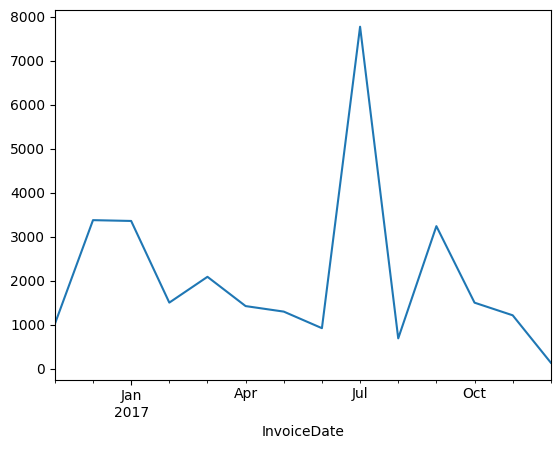

In [338]:
#plot graph  
first_purchase["UnitPrice"].resample("M").sum().plot()

# Visualize: Individual Customer Purchase 

In [339]:
ind = data_1["CustomerID"].unique()

In [340]:
ind

array([17850, 13047, 12583, ..., 13298, 14569, 12713])

In [341]:
ides_selected = ind[0:10]

In [342]:
ides_selected

array([17850, 13047, 12583, 13748, 15100, 15291, 14688, 17809, 15311,
       14527])

In [343]:
customer_new = data_1[data_1["CustomerID"].isin(ides_selected)]

In [344]:
customer_new

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2016-11-29,2.55,17850
1,6,2016-11-29,3.39,17850
2,8,2016-11-29,2.75,17850
3,6,2016-11-29,3.39,17850
4,6,2016-11-29,3.39,17850
...,...,...,...,...
541746,96,2017-12-07,0.69,15311
541747,48,2017-12-07,1.85,15311
541748,24,2017-12-07,3.39,15311
541749,1,2017-12-07,0.21,15311


In [345]:
cust = customer_new.groupby(["CustomerID", "InvoiceDate"]).sum()

In [346]:
cust_1 =cust.reset_index()

In [347]:
cust_1

,CustomerID,InvoiceDate,Quantity,UnitPrice
0,12583,2016-11-29,449,55.29
1,12583,2017-01-05,491,67.19
2,12583,2017-02-08,454,28.71
3,12583,2017-02-13,-1,18.00
4,12583,2017-03-09,325,94.95
...,...,...,...,...
245,17809,2017-10-12,1046,29.99
246,17809,2017-11-21,188,25.70
247,17850,2016-11-29,474,334.76
248,17850,2016-11-30,1259,841.47


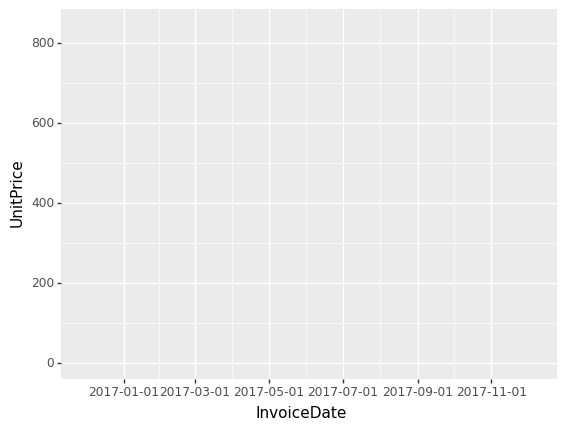

<ggplot: (167178642305)>

In [348]:
import plotnine as pn
from plotnine import ggplot, aes
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID")

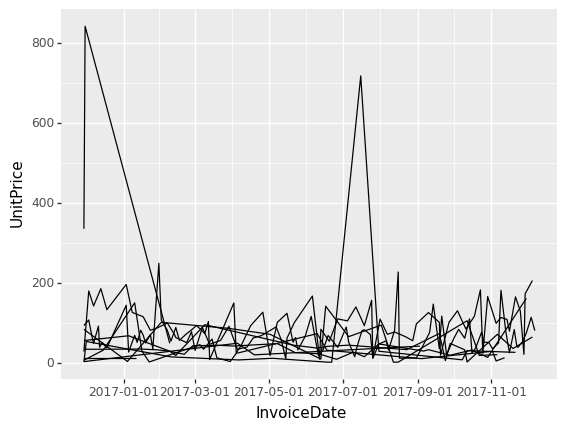

<ggplot: (167178594261)>

In [349]:
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID") + pn.geom_line()

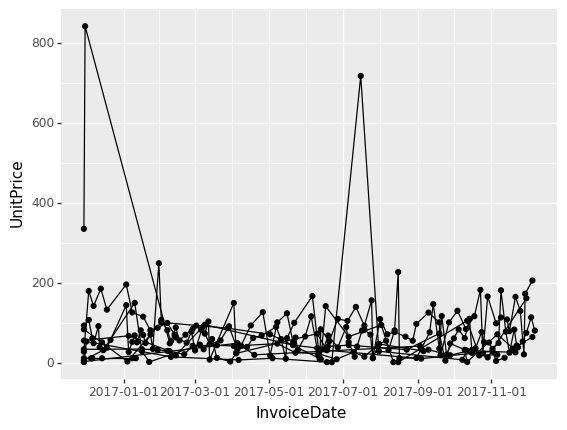

<ggplot: (167186630417)>

In [350]:
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID") + pn.geom_line() + pn.geom_point()

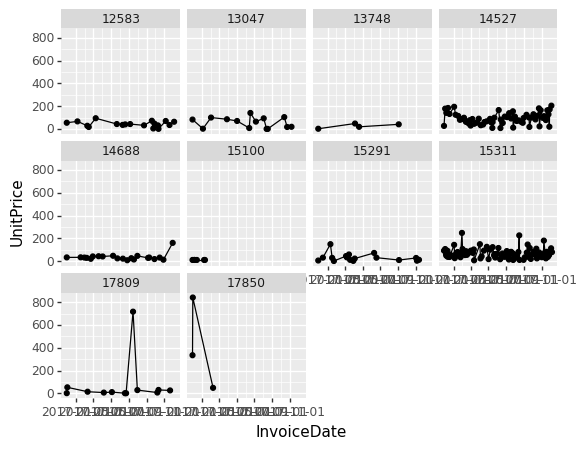

<ggplot: (167193951581)>

In [351]:
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID") + pn.geom_line() + pn.geom_point() + pn.facet_wrap('CustomerID')

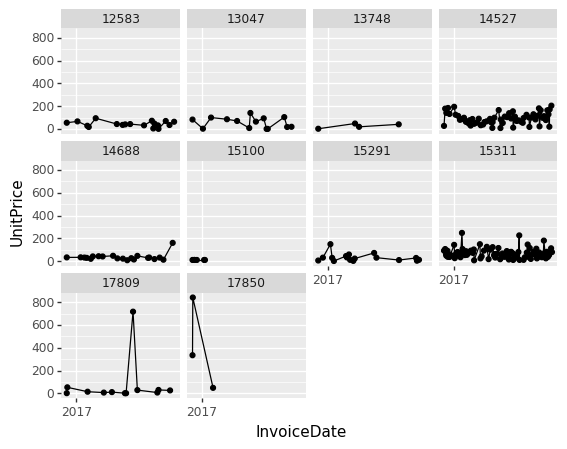

<ggplot: (167188059933)>

In [352]:
ggplot(cust_1) + aes(x="InvoiceDate", y="UnitPrice",group = "CustomerID") + pn.geom_line() + pn.geom_point() + pn.facet_wrap('CustomerID')+ pn.scale_x_date( date_breaks='1 year', date_labels = "%Y")

# Machine Learning 
## frame the Problem
1. what will the customer spend in the next 90days?(REgression)
2. What is the probability of a customer to make a purchase in next 90-days ? (Classification)

## Time splitting 

In [353]:
n_days = 90

In [354]:
data_1

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2016-11-29,2.55,17850
1,6,2016-11-29,3.39,17850
2,8,2016-11-29,2.75,17850
3,6,2016-11-29,3.39,17850
4,6,2016-11-29,3.39,17850
...,...,...,...,...
541904,12,2017-12-07,0.85,12680
541905,6,2017-12-07,2.10,12680
541906,4,2017-12-07,4.15,12680
541907,4,2017-12-07,4.15,12680


In [355]:
max_date = data_1["InvoiceDate"].max()

In [356]:
max_date

Timestamp('2017-12-07 00:00:00')

In [357]:
cut_off = max_date - pd.to_timedelta(n_days, unit="d")

In [358]:
cut_off

Timestamp('2017-09-08 00:00:00')

In [359]:
temporal_data_in = data_1[data_1["InvoiceDate"]<=cut_off]

In [360]:
temporal_data_in

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2016-11-29,2.55,17850
1,6,2016-11-29,3.39,17850
2,8,2016-11-29,2.75,17850
3,6,2016-11-29,3.39,17850
4,6,2016-11-29,3.39,17850
...,...,...,...,...
333860,24,2017-09-07,3.25,15251
333861,48,2017-09-07,1.45,15251
333862,6,2017-09-07,11.95,15251
334050,-1,2017-09-07,7.50,13458


In [361]:
temporal_data_out = data_1[data_1["InvoiceDate"]>cut_off]

In [362]:
temporal_data_out

,Quantity,InvoiceDate,UnitPrice,CustomerID
334054,6,2017-09-09,1.65,16899
334055,6,2017-09-09,1.65,16899
334056,3,2017-09-09,4.15,16899
334057,3,2017-09-09,4.25,16899
334058,3,2017-09-09,4.25,16899
...,...,...,...,...
541904,12,2017-12-07,0.85,12680
541905,6,2017-12-07,2.10,12680
541906,4,2017-12-07,4.15,12680
541907,4,2017-12-07,4.15,12680


# RFM Features
(Recency, Frequency, Monetary Value)
In data science, we call in Features engineering

## Make target from out data set 

In [363]:
temporal_data_out_1 = temporal_data_out.drop("Quantity", axis=1)

In [364]:
temporal_data_out_2 = temporal_data_out_1.groupby('CustomerID').sum()

C:\Users\kunde\AppData\Local\Temp\ipykernel_22800\1258088677.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [365]:
temporal_data_out_3 = temporal_data_out_2.rename({"UnitPrice": "Spend_90_total"}, axis=1)

In [366]:
temporal_data_out_3

,Spend_90_total
CustomerID,
12347,134.30
12348,42.50
12349,605.10
12352,311.03
12356,23.70
...,...
18277,25.13
18278,29.55
18282,23.52


In [367]:
temporal_data_out_4 = temporal_data_out_3.assign(spend_90_flag=1)

#### WE can easily see in below cell which customer made purchases in previous 90 days 

In [368]:
temporal_data_out_4

,Spend_90_total,spend_90_flag
CustomerID,,
12347,134.30,1
12348,42.50,1
12349,605.10,1
12352,311.03,1
12356,23.70,1
...,...,...
18277,25.13,1
18278,29.55,1
18282,23.52,1


## make Recency (date) Feature From in date 

In [369]:
#max date before that 90days 
max_date = temporal_data_in["InvoiceDate"].max()

In [370]:
max_date

Timestamp('2017-09-07 00:00:00')

In [371]:
temporal_data_in_1 = temporal_data_in[["CustomerID", "InvoiceDate"]]

In [372]:
temporal_data_in_1

,CustomerID,InvoiceDate
0,17850,2016-11-29
1,17850,2016-11-29
2,17850,2016-11-29
3,17850,2016-11-29
4,17850,2016-11-29
...,...,...
333860,15251,2017-09-07
333861,15251,2017-09-07
333862,15251,2017-09-07
334050,13458,2017-09-07


In [373]:
temporal_data_in_2 = temporal_data_in_1.groupby("CustomerID")

In [374]:
temporal_data_in_2

In [375]:
#actually recency means customer purchase lag period like recency is more customer is not live in purchase 
#actually recency is min is better for us 
temporal_data_in_3 = temporal_data_in_2.apply(lambda x: (x["InvoiceDate"].max()-max_date)/ pd.to_timedelta(1, "day"))

In [376]:
temporal_data_in_3

CustomerID
12346   -234.0
12347    -38.0
12348   -157.0
12350   -219.0
12352   -171.0
         ...  
18280   -186.0
18281    -89.0
18282    -31.0
18283     -4.0
18287   -110.0
Length: 3412, dtype: float64

In [377]:
temporal_data_in_4 = temporal_data_in_3.to_frame()

In [378]:
temporal_data_in_5 = temporal_data_in_4.set_axis(["recency"], axis=1)

In [379]:
temporal_data_in_5

,recency
CustomerID,
12346,-234.0
12347,-38.0
12348,-157.0
12350,-219.0
12352,-171.0
...,...
18280,-186.0
18281,-89.0
18282,-31.0


## Frequancy feature 

In [380]:
temporal_data_in_11 = temporal_data_in[["CustomerID", "InvoiceDate"]]

In [381]:
temporal_data_in_12 = temporal_data_in_11.groupby("CustomerID").count()

In [382]:
temporal_data_in_12

,InvoiceDate
CustomerID,
12346,2
12347,124
12348,28
12350,17
12352,48
...,...
18280,10
18281,7
18282,8


In [383]:
temporal_data_in_13=temporal_data_in_12.set_axis(["frequency"], axis=1)

In [384]:
temporal_data_in_13

,frequency
CustomerID,
12346,2
12347,124
12348,28
12350,17
12352,48
...,...
18280,10
18281,7
18282,8


## Monetary feature 

In [385]:
temporal_data_in_21 = temporal_data_in.groupby("CustomerID")

In [386]:
temporal_data_in_21

In [387]:
temporal_data_in_22 = temporal_data_in_21.aggregate({"UnitPrice": ("sum","mean")})

In [388]:
temporal_data_in_23 = temporal_data_in_22.set_axis(["Price_sum", "price_mean"], axis=1)

In [389]:
temporal_data_in_23

,Price_sum,price_mean
CustomerID,,
12346,2.08,1.040000
12347,346.91,2.797661
12348,136.21,4.864643
12350,65.30,3.841176
12352,1900.07,39.584792
...,...,...
18280,47.65,4.765000
18281,39.36,5.622857
18282,39.16,4.895000


# All Three feature of RFM

In [390]:
feature_data = pd.concat((temporal_data_in_5,temporal_data_in_13 ,temporal_data_in_23), axis=1)

In [391]:
feature_data_1 = feature_data.merge(temporal_data_out_4, left_index=True, right_index=True, how="left")

In [392]:
feature_data_1

,recency,frequency,Price_sum,price_mean,Spend_90_total,spend_90_flag
CustomerID,,,,,,
12346,-234.0,2,2.08,1.040000,NaN,NaN
12347,-38.0,124,346.91,2.797661,134.30,1.0
12348,-157.0,28,136.21,4.864643,42.50,1.0
12350,-219.0,17,65.30,3.841176,NaN,NaN
12352,-171.0,48,1900.07,39.584792,311.03,1.0
...,...,...,...,...,...,...
18280,-186.0,10,47.65,4.765000,NaN,NaN
18281,-89.0,7,39.36,5.622857,NaN,NaN
18282,-31.0,8,39.16,4.895000,23.52,1.0


In [393]:
feature_data_2=feature_data_1.fillna(0)

In [394]:
feature_data_2

,recency,frequency,Price_sum,price_mean,Spend_90_total,spend_90_flag
CustomerID,,,,,,
12346,-234.0,2,2.08,1.040000,0.00,0.0
12347,-38.0,124,346.91,2.797661,134.30,1.0
12348,-157.0,28,136.21,4.864643,42.50,1.0
12350,-219.0,17,65.30,3.841176,0.00,0.0
12352,-171.0,48,1900.07,39.584792,311.03,1.0
...,...,...,...,...,...,...
18280,-186.0,10,47.65,4.765000,0.00,0.0
18281,-89.0,7,39.36,5.622857,0.00,0.0
18282,-31.0,8,39.16,4.895000,23.52,1.0


# machine Learning 

## Next 90-day spend prediction 
This is predict on basis of previous 90 days data 

In [395]:
from xgboost import XGBClassifier, XGBRegressor

In [396]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [397]:
x = feature_data_2[["recency", "frequency", "Price_sum", "price_mean"]]

In [398]:
x

,recency,frequency,Price_sum,price_mean
CustomerID,,,,
12346,-234.0,2,2.08,1.040000
12347,-38.0,124,346.91,2.797661
12348,-157.0,28,136.21,4.864643
12350,-219.0,17,65.30,3.841176
12352,-171.0,48,1900.07,39.584792
...,...,...,...,...
18280,-186.0,10,47.65,4.765000
18281,-89.0,7,39.36,5.622857
18282,-31.0,8,39.16,4.895000


In [399]:
y = feature_data_2["Spend_90_total"]

In [400]:
y 

CustomerID
12346      0.00
12347    134.30
12348     42.50
12350      0.00
12352    311.03
          ...  
18280      0.00
18281      0.00
18282     23.52
18283    467.62
18287     47.63
Name: Spend_90_total, Length: 3412, dtype: float64

In [401]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [402]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [403]:
x_train.shape

(3070, 4)

In [404]:
y_train.shape

(3070,)

In [405]:
model = XGBRegressor(objective="reg:squarederror", random_state=123)

In [406]:
model_1 = GridSearchCV(estimator=model, param_grid=dict(learning_rate=[0.01, 0.1, 0.3, 0.5]), scoring="neg_mean_absolute_error", refit= True, cv =5)

In [407]:
model_1.fit(x_train, y_train )

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=123, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='neg_mean_absolute_error')

In [408]:
predict_train = model_1.predict(x_train)


In [409]:
predict_train


array([438.71933 ,  51.636616,  46.273163, ..., 109.51451 ,  44.14128 ,
       175.81892 ], dtype=float32)

In [410]:
model_1.best_score_

-106.61653448945738

In [411]:
model_1.best_params_

{'learning_rate': 0.01}

In [412]:
model_1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=123, ...)

# Next 90 days probablity (classification)

In [413]:
y_1 = feature_data_2["spend_90_flag"]

In [414]:
model_2 =  XGBClassifier( objective= "binary:logistic", random_state=123)

In [415]:
model_21 = GridSearchCV(estimator=model_2, param_grid=dict(learning_rate = [0.01, 0.1, 0.3, 0.5]), scoring="roc_auc", cv=5)

In [416]:
model_21.fit(x, y_1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=123, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='roc_auc')

In [417]:
model_21.best_score_

0.7290607404107874

In [418]:
model_21.best_params_

{'learning_rate': 0.01}

In [419]:
model_21.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=123, ...)

In [420]:
model_21.predict(x_train)

array([1, 1, 1, ..., 1, 0, 1])

# Feature importance

In [421]:
imp_spend_amount_dict = model_1.best_estimator_

In [422]:
imp_spend_amount_dict_1 = imp_spend_amount_dict.get_booster()

In [423]:
imp_spend_amount_dict_2 = imp_spend_amount_dict_1.get_score(importance_type='gain')

In [424]:
imp_spend_amount_dict_2

{'recency': 7752066.0,
 'frequency': 1265345.0,
 'Price_sum': 18972538.0,
 'price_mean': 96771760.0}